In [9]:
import json


jsonFileName = "data.json"

#This is the threshold for text that are similar sizes  
pixelDiferenceThreshold = 5

def convert(string): 
    li = list(string.split(",")) 
    return li

def boxHeight(data):
    boundingBox = convert(data["boundingBox"])
    return int(boundingBox[3]) 

def boxWidth(data):
    boundingBox = convert(data["boundingBox"])
    return int(boundingBox[2])

def boxXPos(data):
    boundingBox = convert(data["boundingBox"])
    return int(boundingBox[0])

def boxYPos(data):
    boundingBox = convert(data["boundingBox"])
    return int(boundingBox[1])

def getBoxList(data):
    return convert(data)
    
def averageWordHeight(data):

    total = 0
    count = 0
    for region in data["regions"]:
        for line in region["lines"]:
            for word in line["words"]:
                total += boxHeight(word)
                count += 1

    return total/count

def averageWordWidth(data):
    total = 0
    count = 0

    for region in data["regions"]:
        for line in region["lines"]:
            for word in line["words"]:
                total += boxWidth(word)
                count += 1

    return total/count

def averageSpaceWidth(data):
    total = 0
    count = 0

    for region in data["regions"]:
        for line in region["lines"]:
            wordCount =  len(line["words"])
            for i in range(wordCount-1):
                total += boxXPos(line["words"][i+1]) - (boxXPos(line["words"][i]) + boxWidth(line["words"][i])) 
                count += 1

    return total/count

                                     
def averageCharacterWidth(data):
    total = 0
    wordCount = 0
    for region in data["regions"]:
        for line in region["lines"]:
            wordCount +=  len(line["words"])
            for word in line["words"]:
                characterCount = len(word["text"])
                width = boxWidth(word)
                total += width/characterCount

    return total/wordCount
#this makes box1 bigger
def checkBoundaryBoxCollision(box1,box2):
    b1W = boxWidth(box1)
    b2W = boxWidth(box2)
    b1H = boxHeight(box1)
    b2H = boxHeight(box2)
    b1X = boxXPos(box1) 
    b2X = boxXPos(box2)
    b1Y = boxYPos(box1) 
    b2Y = boxYPos(box2)
    '''if b1W<b1H:
        b1X = b1X - (b1W/4)
        b1Y = b1Y - (b1H/2)
        b1W = b1W +(b1W*1.5)
        b1H = b1H +(b1H*2)
    else:
        b1X = b1X - (b1W/2)
        b1Y = b1Y - (b1H/4)
        b1W = b1W +(b1W*2)
        b1H = b1H +(b1H*1.5)
        
    if b2W<b2H:
        b2X = b2X - (b2W/4)
        b2Y = b2Y - (b2H/2)
        b2W = b2W +(b2W*1.5)
        b2H = b2H +(b2H*2)
    else:
        b2X = b2X - (b2W/2)
        b2Y = b2Y - (b2H/4)
        b2W = b2W +(b2W*2)
        b2H = b2H +(b2H*1.5)'''
        

    if (b1X < (b2X + b2W) and (b1X + b1W) > b2X and b1Y < (b2Y + b2H) and (b1Y + b1H) > b2Y):
        return True
    else:
        return False

def isLineIsolated(checkLine,data):
    checkLineX = boxXPos(checkLine)
    checkLineY = boxYPos(checkLine)
    for region in data["regions"]:
        for line in region["lines"]:
            lineX = boxXPos(line)
            lineY = boxYPos(line)
            for word1 in line["words"]:
                for word2 in checkLine["words"]:
                    #checks if same line
                    if (checkLineX != lineX and checkLineY!=lineY):
                        if checkBoundaryBoxCollision(word2, word1):
                            return False
    return True
    
def getLineText(line):
    text = ""
    for word in line["words"]:
        text += word["text"]
        text += " " 
    return text

# puts the text into sections and puts those sections as strings in a list
def sectionizer(data):
    sections = []
    section = ""
    pastLine = None
    for line in data["regions"]["lines"]:
        if pastLine == None:
            section += line["text"]
            pastLine = line
        else:
            pass

    return sections
def lineIsIndented(region,line):
    rX = boxXPos(region)
    wX = boxXPos(line["words"][0]) 
    result =  (rX + pixelDiferenceThreshold) < wX
    return result

def printByRegion(data):
    rc = 1
    for region in data["regions"]:
        print("Region "+str(rc))
        for line in region["lines"]:
            linetxt = ""
            if (lineIsIndented(region,line)):
                linetxt += "\t"
            
            for word in line["words"]:
                linetxt += word["text"]
                linetxt += " " 
            print(linetxt)
        rc+=1
        print("--------------------------")

with open(jsonFileName) as json_data:
    data = json.load(json_data)
    
for region in data["regions"]:
    for line in region["lines"]:
        if isLineIsolated(line,data):
            print(getLineText(line))

print(getLineText(data["regions"][1]["lines"][0]))

displayed a willingness to subjugate outsiders—first 
Indians, who were nearly annihilated through war and 
disease, and then Africans, who were brought in chains 
to serve as slave labor, especially on the tobacco, rice, 
and indigo plantations of the southern colonies. 
But if the settlement experience gave people a com- 
mon stock of values, both good and bad, it also divided 
them. The thirteen colonies were quite different from 
one another. Puritans carved tight, pious, and relatively 
democratic communities of small family farms out of 
rocky-soiled New England. Theirs was a homogeneous 
world in comparison to most of the southern colonies, 
where large landholders, mostly Anglicans, built plan- 
tations along the coast from which they lorded over a 
labor force of black slaves and looked down upon the 
poor white farmers who settled the backcountry. Differ- 
ent still were the middle colonies stretching from New 
York to Delaware. There diversity reigned. Well-to-do 
merchants 

In [2]:
line_infos = []
for region in data["regions"]:
    for line in region["lines"]:
        line_infos.append(line)


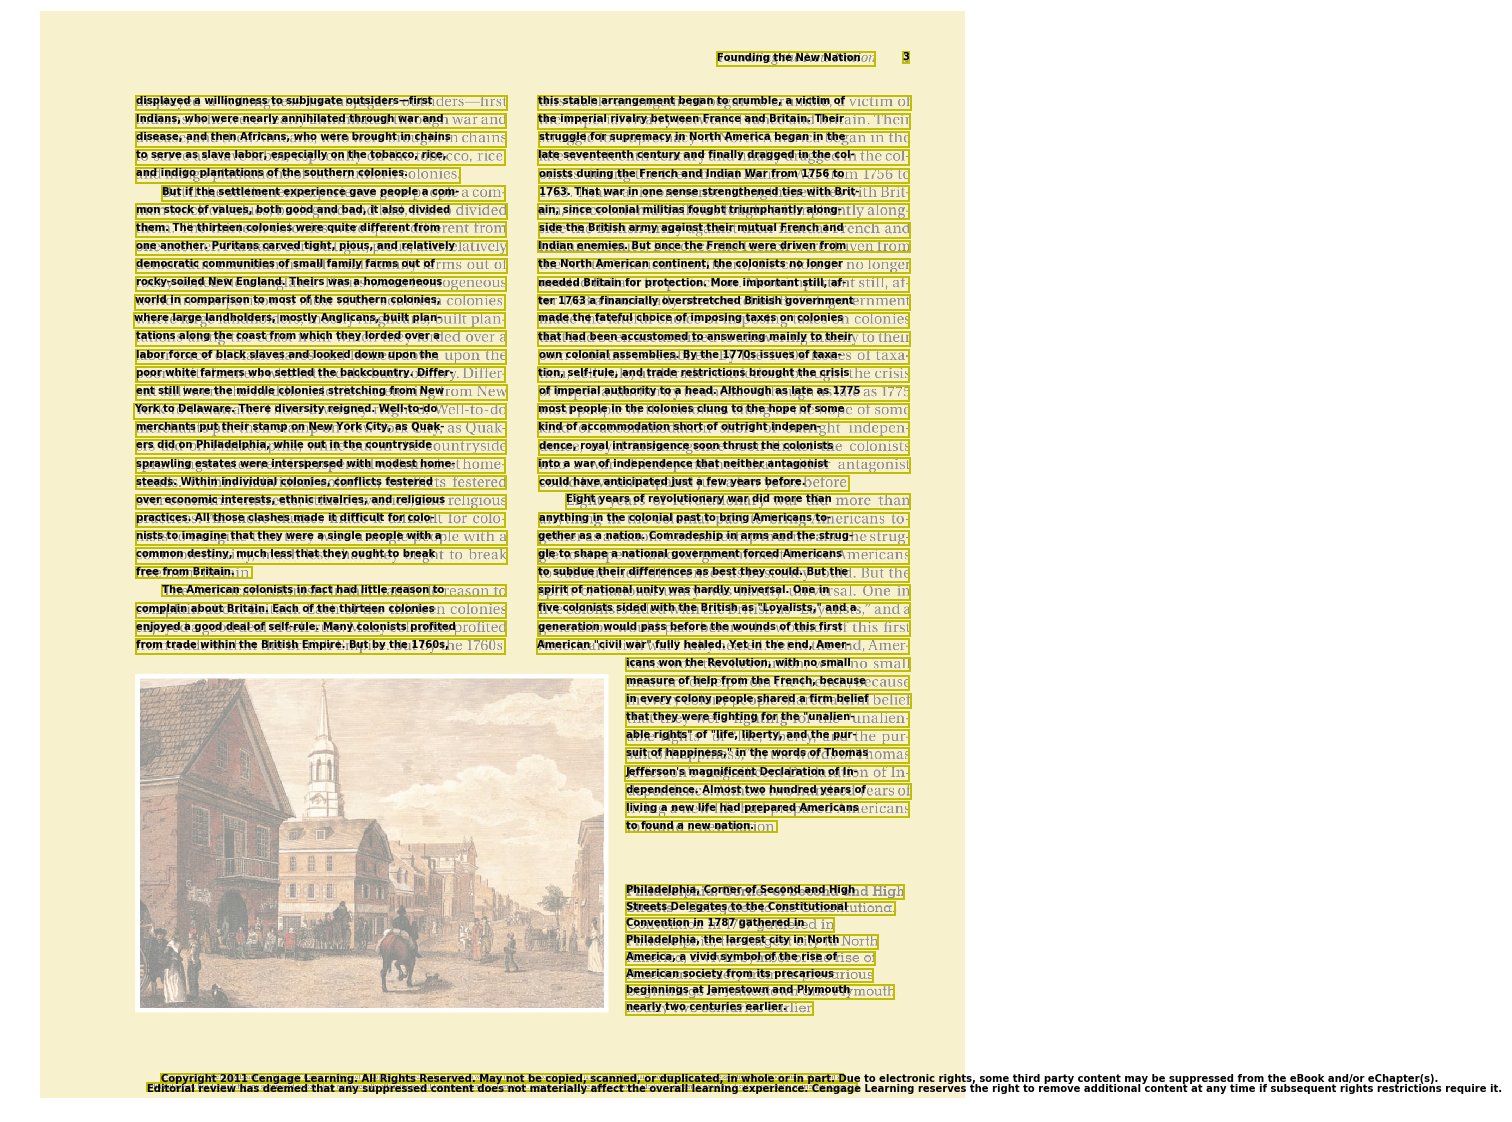

In [3]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.figure(figsize=(20,20))

image  = Image.open("test-image.jpg")
ax     = plt.imshow(image, alpha=0.5)
for line in line_infos:
    bbox = [int(num) for num in line["boundingBox"].split(",")]
    text = getLineText(line)
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=10, weight="bold", va="top")
_ = plt.axis("off")

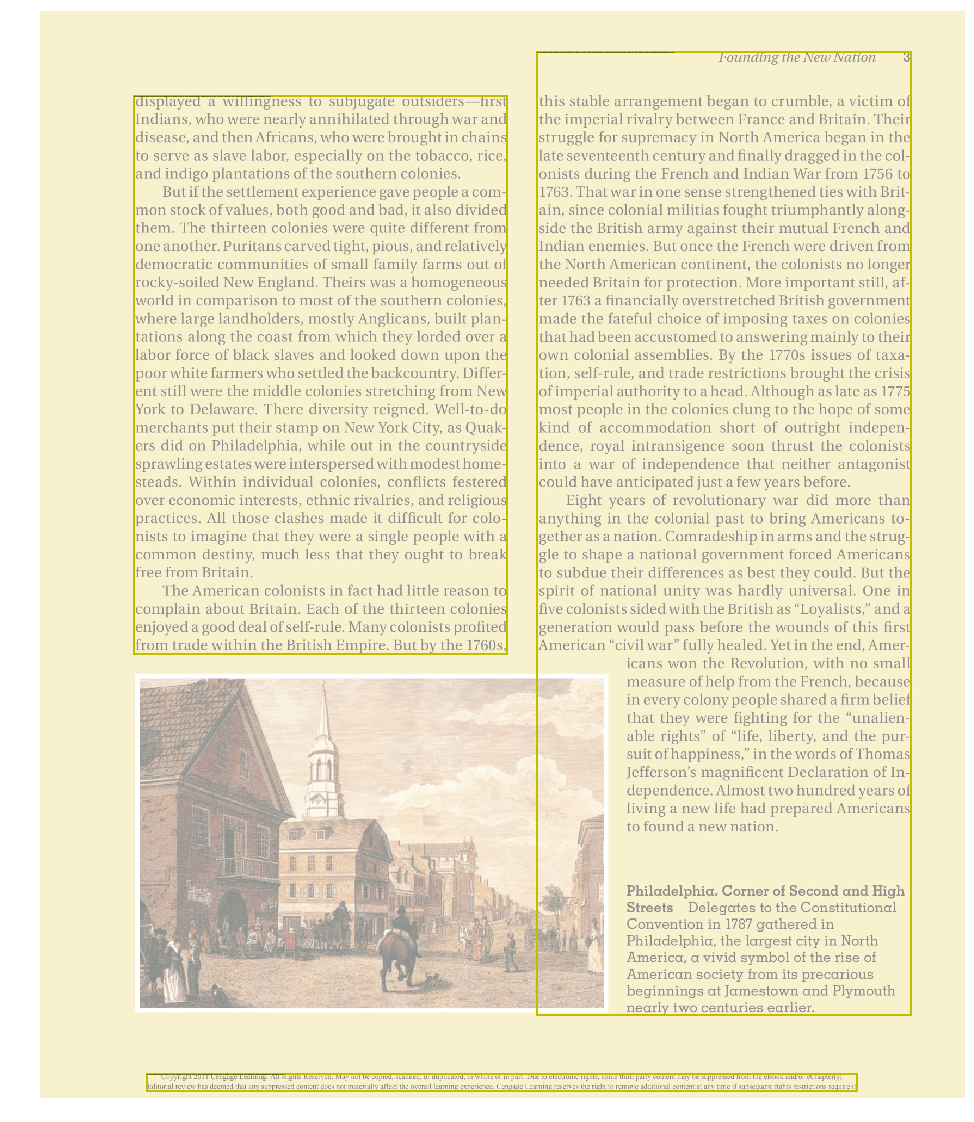

In [4]:
plt.figure(figsize=(20,20))

image  = Image.open("test-image.jpg")
ax     = plt.imshow(image, alpha=0.5)
for region in data["regions"]:
    bbox = [int(num) for num in region["boundingBox"].split(",")]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=1, weight="bold", va="top")
_ = plt.axis("off")

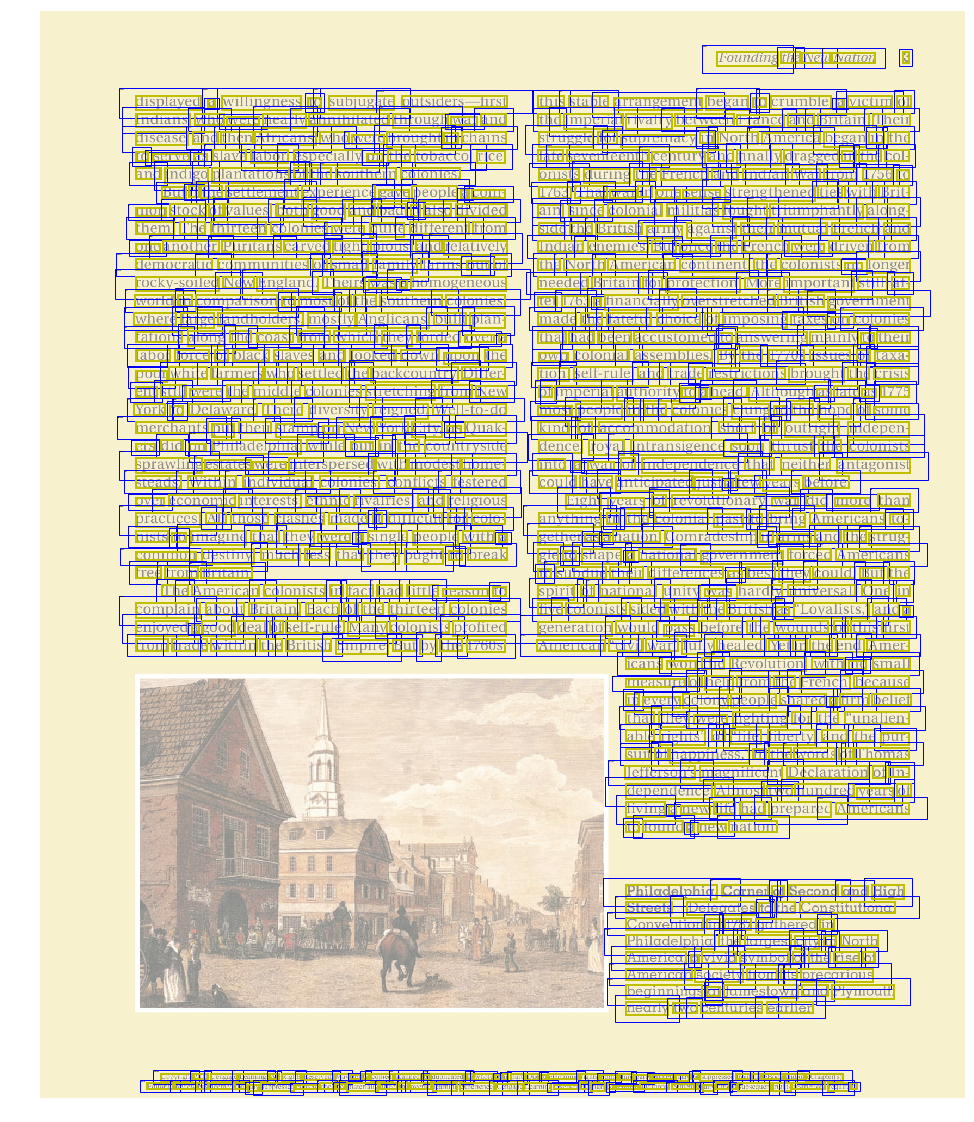

In [5]:
plt.figure(figsize=(20,20))

image  = Image.open("test-image.jpg")
ax     = plt.imshow(image, alpha=0.5)

for region in data["regions"]:
    for line in region["lines"]:
        for word in line["words"]:
            bbox = [int(num) for num in word["boundingBox"].split(",")]
            origin = (bbox[0], bbox[1])
            text = word["text"]
            patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
            ax.axes.add_patch(patch)
            if bbox[2] > bbox[3]:
                origin = (bbox[0] - (bbox[2]/4), bbox[1]- (bbox[3]/2))
                patch  = Rectangle(origin, bbox[2]*1.5, bbox[3]*2, fill=False, linewidth=1, color='b')
                ax.axes.add_patch(patch)
            else:
                origin = (bbox[0] - (bbox[2]/2), bbox[1]- (bbox[3]/4))
                patch  = Rectangle(origin, bbox[2]*2, bbox[3]*1.5, fill=False, linewidth=1, color='b')
                ax.axes.add_patch(patch)
            
            plt.text(origin[0], origin[1], text, fontsize=1, weight="bold", va="top")
_ = plt.axis("off")